# Data Read and Cleaning

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('D:/nyc_trip_dataset.csv')    # dataset read

In [6]:
df.head(5)     # top 5 values

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 09:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 06:42,17-02-2016 06:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
df.shape     # number of rows and columns in dataset

(729322, 11)

In [5]:
df.columns    # column names

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
df.isnull().sum()     # rows with null values

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

# Data Types

In [7]:
df.dtypes     # data types of each object

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
df.dtypes[df.dtypes=='int64']      # selecting objects with type int

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [9]:
df.dtypes[df.dtypes=='float64']      # selecting objects with type float

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [10]:
df.dtypes[df.dtypes=='object']       # selecting object datatype

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

We have to convert pickup_datetime, dropoff_datetime to datetime datatype and store_and_fwd_flag to category datatype

In [14]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])      # converting pickup, dropoff_datetime to datetime datatype
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [67]:
pickup_date_time = pd.DatetimeIndex(df['pickup_datetime'])
dropoff_date_time=pd.DatetimeIndex(df['dropoff_datetime'])
df['doy_pickup']=pickup_date_time.day_of_year
df['woy_pickup']=pickup_date_time.weekofyear
df['moy_pickup']=pickup_date_time.month
df['dow_pickup']=pickup_date_time.day_of_week
df['doy_dropoff']=dropoff_date_time.day_of_year
df['woy_dropoff']=dropoff_date_time.weekofyear
df['moy_dropoff']=dropoff_date_time.month
df['dow_dropoff']=dropoff_date_time.day_of_week

In [13]:
df.info()       #  Structure of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
 11  pickup_hour         729322 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 66.8+ MB


In [66]:
df.nunique()     # unique values for each dataset

id                    729321
vendor_id                  2
pickup_datetime       223893
dropoff_datetime      224158
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6295
pickup_hour               24
pickup_day                 7
dropoff_day                7
pickup_timezone            4
dropoff_timezone           4
dropoff_hour              24
duration_time              5
doy_pickup               182
woy_pickup                36
moy_pickup                12
dow_pickup                 7
doy_dropoff              183
woy_dropoff               36
moy_dropoff               12
dow_dropoff                7
dtype: int64

# Univarient Analysis

### Distribution on trip_duration

In [18]:
df.select_dtypes(include=['int64','float64']).describe()        # describing important parameters of dataset

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,13.611698
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,6.402853
min,1.000000,0.000000,-121.933342,34.712235,-121.933304,32.181141,1.000000e+00,0.000000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,9.000000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,14.000000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,19.000000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,23.000000


In [68]:
df['trip_duration'].describe()    # Univarient analysis on trip_duration

count    729321.000000
mean        949.570793
std        3127.522020
min           1.000000
25%         397.000000
50%         663.000000
75%        1075.000000
max       86391.000000
Name: trip_duration, dtype: float64

Avg trip duration will take 949 seconds.

A considerable difference is seen between the max trip value and the 75% quantile value. We have to check for outliers.

In [78]:
# Calculating the skewness and kurtosis of the variable

def add_stat(x):
    m = df.loc[:,x].mode()
    s = skew(df[x])
    k = kurtosis(df[x])
    W, p = stats.shapiro(df['trip_duration'])
    print(f'Mode = {m}')
    print(f'Skew = {s}')
    print(f'Kurtosis = {k}')
    if p <= 0.5:
        print(f'Null hypothesis of normality is rejected.')
    else:
        print(f'Null hypothesis of normality is accepted.')

In [79]:
# Calculating additional statistics
add_stat('trip_duration')

Mode = 0    348
Name: trip_duration, dtype: int64
Skew = 25.583666840994194
Kurtosis = 684.7515546611023
Null hypothesis of normality is rejected.


we can see the variable trip_duration has a high kurtosis and it is skew. These resutls indicate that the variable is not normally distributed.

<Axes: title={'center': 'Histogram for Trip_Duration'}, xlabel='trip_duration', ylabel='Count'>

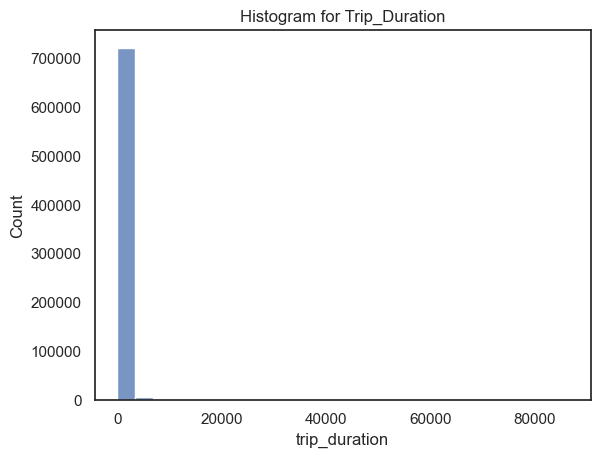

In [80]:
# Plotting a Histogram to inspect distribution and outliers
plt.title('Histogram for Trip_Duration')
sns.histplot(df['trip_duration'], kde=False, bins=25)

<Axes: title={'center': 'Boxplot for Trip_Duration'}, xlabel='trip_duration'>

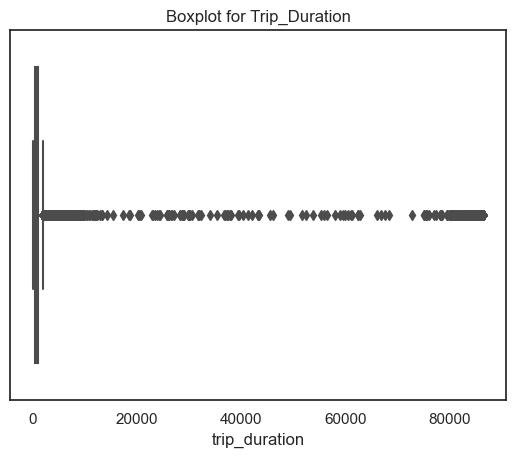

In [81]:
plt.title('Boxplot for Trip_Duration')     # box plot
sns.boxplot(x = df['trip_duration'])

In [82]:
# removing the outlier 
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_hour,duration_time,doy_pickup,woy_pickup,moy_pickup,dow_pickup,doy_dropoff,woy_dropoff,moy_dropoff,dow_dropoff
259437,id0593332,2,2016-05-31 13:00:00,2016-01-06 13:00:00,1,-73.781952,40.644688,-73.993874,40.745926,N,...,13,>20,152,22,5,1,6,1,1,2


In [84]:
# Dopping the outlier from maximum

df.drop(df[df['trip_duration'] ==  86391.00].index, inplace = True)

In [85]:
# Checking the new maximum
df[df['trip_duration'] == df['trip_duration'].max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_hour,duration_time,doy_pickup,woy_pickup,moy_pickup,dow_pickup,doy_dropoff,woy_dropoff,moy_dropoff,dow_dropoff
119185,id2837671,2,2016-06-30 16:37:00,2016-01-07 16:37:00,1,-73.992279,40.749729,-73.962524,40.80077,N,...,16,>20,182,26,6,3,7,1,1,3


Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

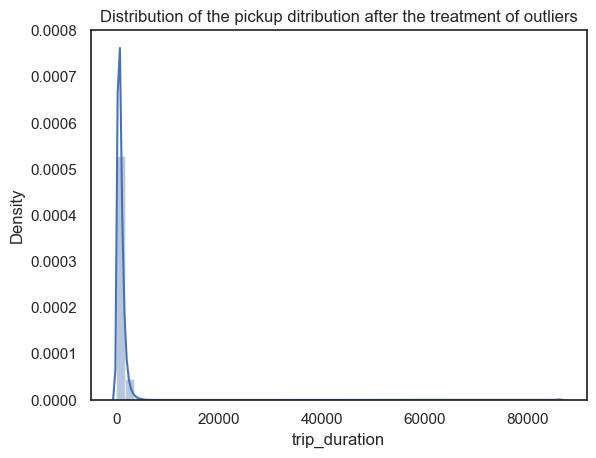

In [92]:
sns.distplot(df['trip_duration'])   # distribution of the trip_duration after we have dropped the outlier
plt.title('Distribution of the pickup ditribution after the treatment of outliers')



### Distribution on passenger_count

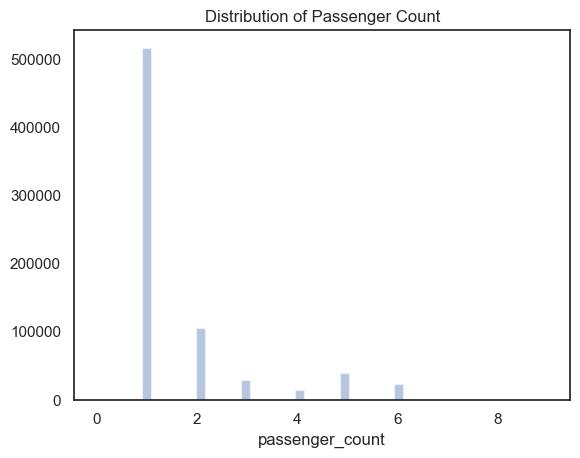

In [87]:
sns.distplot(df['passenger_count'],kde=False)     # histogram of number of passengers in each trip   
plt.title('Distribution of Passenger Count')
plt.show()

It is observed mostly 1 or 2 passengers travel in cab

### Distribution of pickup and dropoff days

In [23]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()    # converting these dates into days of the week
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [24]:
df['pickup_day'].value_counts()       # distribution of the different days of week

Saturday     110881
Friday       106615
Thursday     106104
Wednesday    105299
Tuesday      101689
Sunday       101302
Monday        97432
Name: pickup_day, dtype: int64

We see saturday has the most number of cabs while monday has least

In [25]:
df['dropoff_day'].value_counts()      # distribution of the different days of week

Saturday     110952
Friday       106626
Thursday     105733
Wednesday    105140
Sunday       101768
Tuesday      101759
Monday        97344
Name: dropoff_day, dtype: int64

We see saturday has the most number of cabs while monday has least

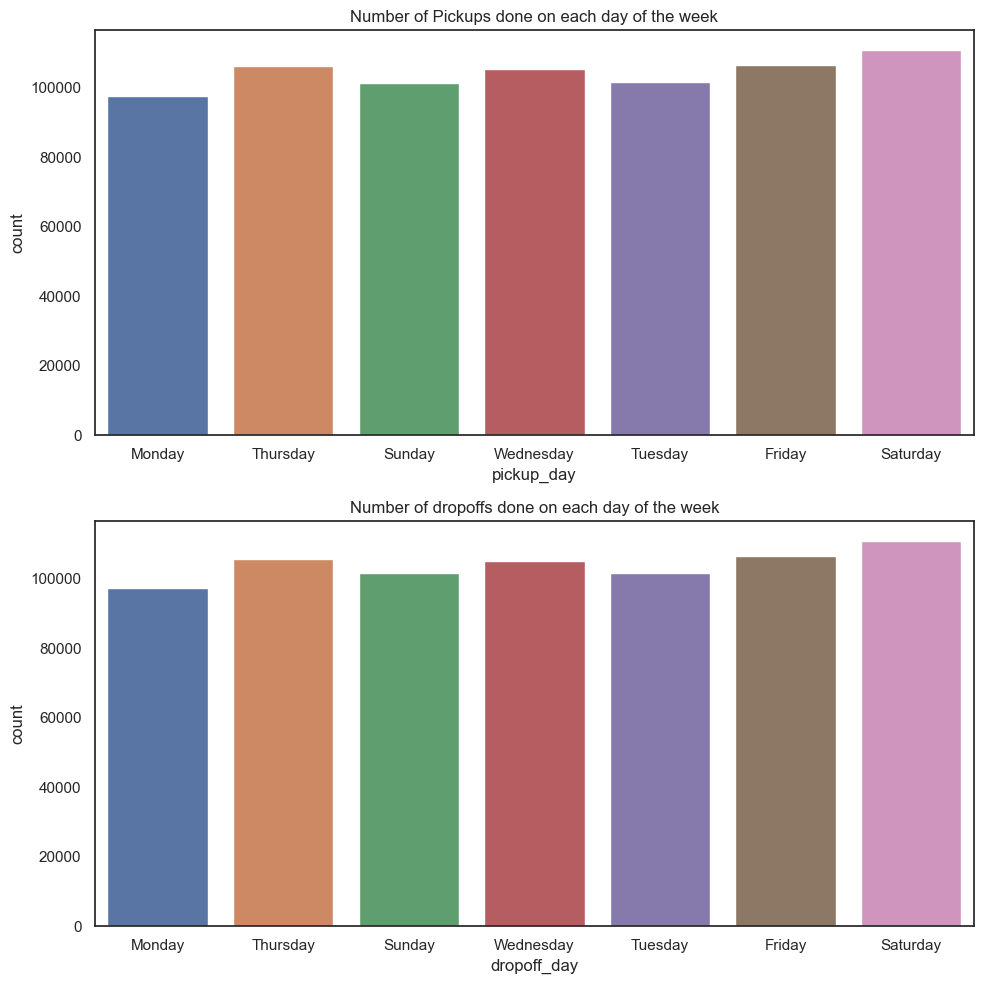

In [26]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))      # distribution of days of the week graphically
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

### Distribution of Pickup and Drop Off hours of the day

Time is categoised into 4 slots, morning(4am to 10am), midday(10am to 4pm), evening(4pm to 10pm), late night(10pm to 4am)

In [88]:
# function definition for time slot
 def timeslot(x):          
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timeslot(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timeslot(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

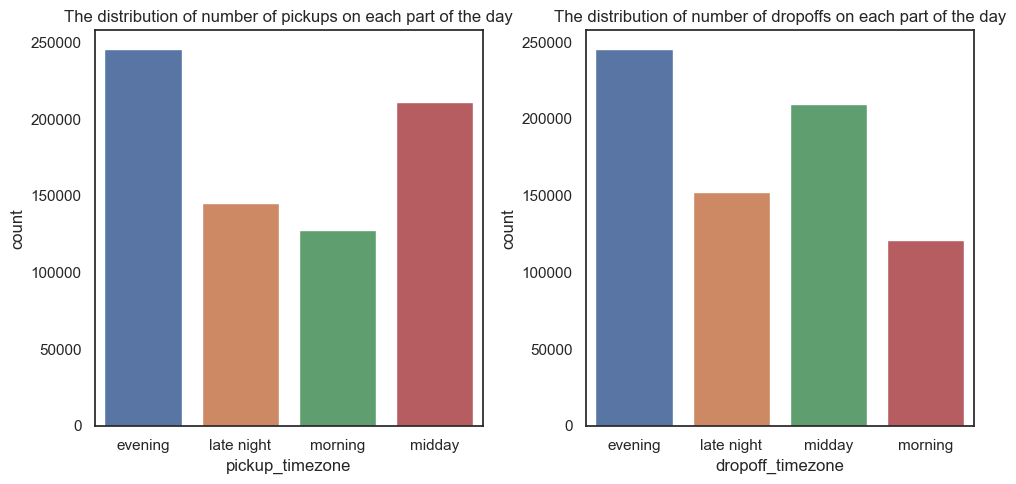

In [32]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))     # timeslot distribution graphically
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

we observe that most pickups and drops occur in the evening. While the least drops and pickups occur during morning.

Text(0.5, 1.0, 'Distribution of dropoff hours')

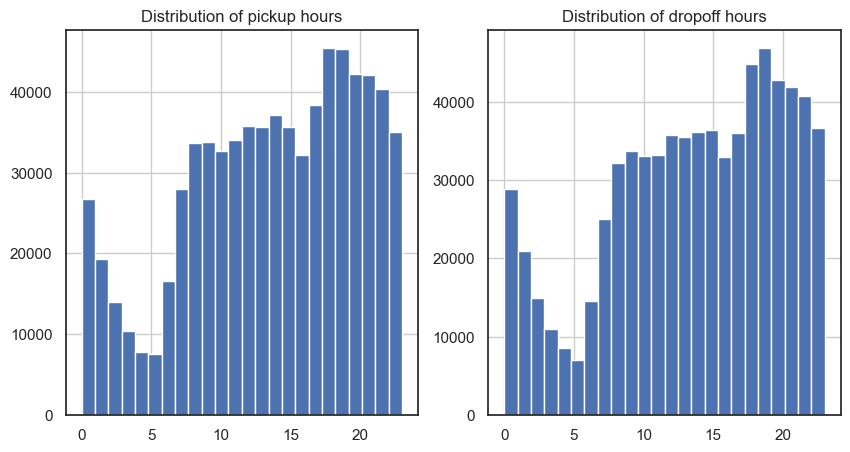

In [33]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))   # distribution by hours of day
df['pickup_hour']=df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

Both graphs are almost similar and it allignes with the previous distribution

### Distribution of the stored and forward flag

In [91]:
df['store_and_fwd_flag'].value_counts()

N    725280
Y      4040
Name: store_and_fwd_flag, dtype: int64

### Distribution of geographical location

Text(0.5, 1.0, 'The distribution of Pick up Longitude')

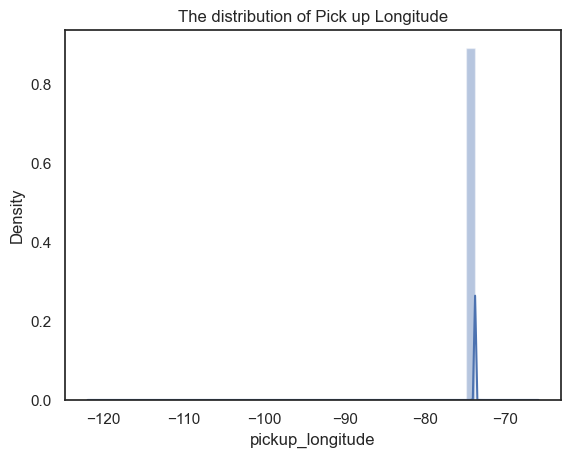

In [47]:
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

Text(0.5, 1.0, 'The distribution of Drop off Longitude')

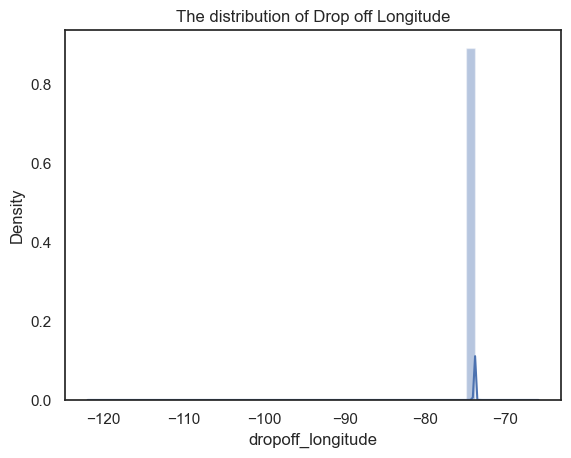

In [46]:
sns.distplot(df['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

Text(0.5, 1.0, 'The distribution of pick up Latitude')

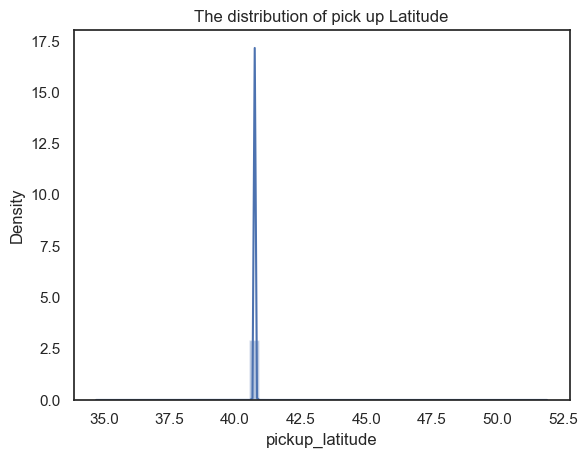

In [48]:
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')

### Distribution of vendor_id

<Axes: >

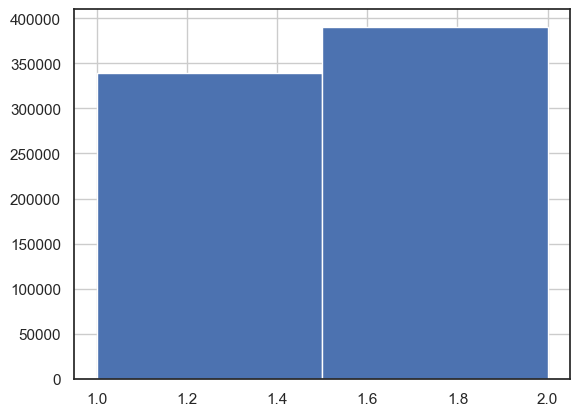

In [49]:
df['vendor_id'].hist(bins=2)

# Bivariate Analysis

### Relationship between Trip Duration and The day of the week

<Axes: xlabel='pickup_day', ylabel='trip_duration'>

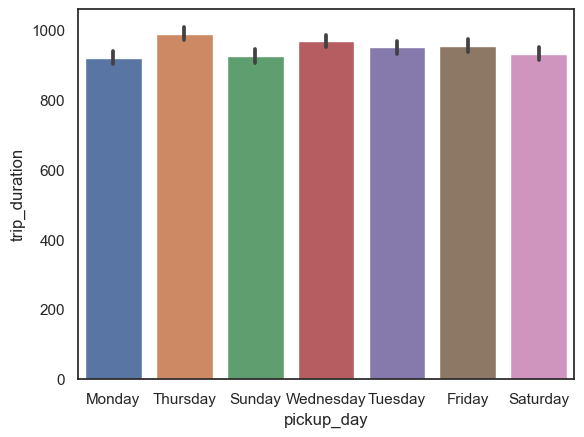

In [102]:
# Trip Duration by Day of the Week
sns.barplot(x="pickup_day", y='trip_duration', data=df)

Thus the highest avg time taken to complete a trip is on Thursday while Monday, Saturday and Sunday takes the least time.

<Axes: xlabel='pickup_timezone', ylabel='trip_duration'>

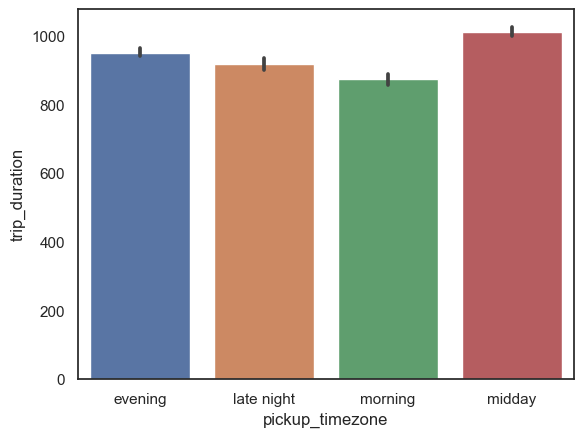

In [98]:
# Trip Duration by Day of the Week
sns.barplot(x="pickup_timezone", y='trip_duration', data=df)

It is observed trip_duration to be highest in midday while low in mornings

<Axes: xlabel='pickup_hour', ylabel='trip_duration'>

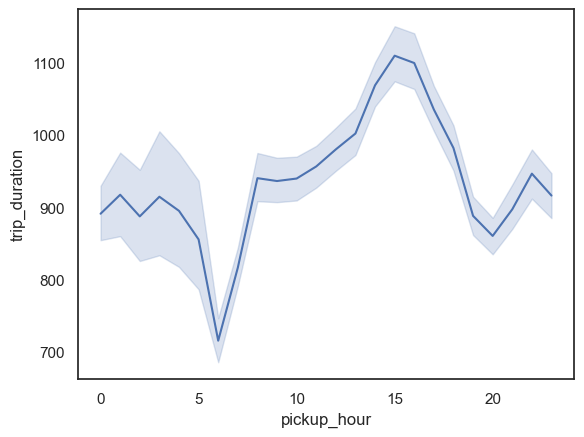

In [101]:
# Trip Duration per hour
sns.lineplot(x='pickup_hour', y='trip_duration', data=df)

We can see that the afternoon is the busiest time of the day. Most of the demand starts between 2:00 pm and 3:30 pm. Each trip last on average around 16.67 minutes.

### Relationship between passenger_count and trip_duration

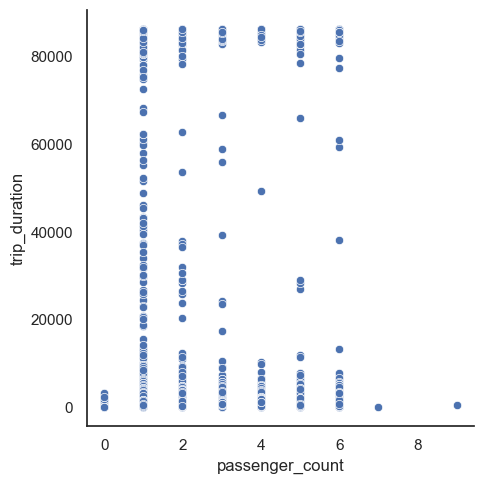

In [54]:
sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

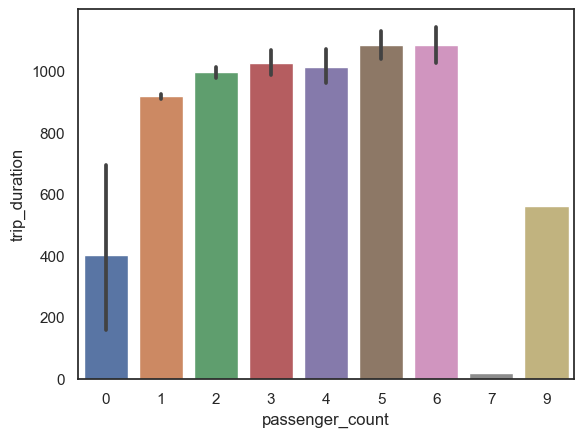

In [95]:
# Trip duration per passanger count
sns.barplot(x='passenger_count',y='trip_duration', data=df)

It is observed as number of passengers are increased trip duration tend to increase

### Relationship between vendor_id and trip_duration

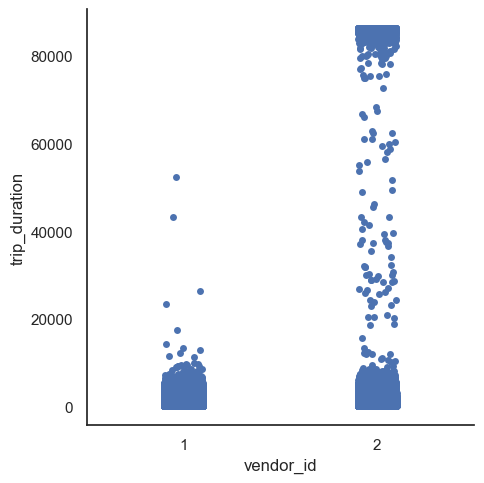

In [55]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)

We see that vendor 1 mostly provides short trip duration cabs while vendor 2 provides cab for both short and long trips

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

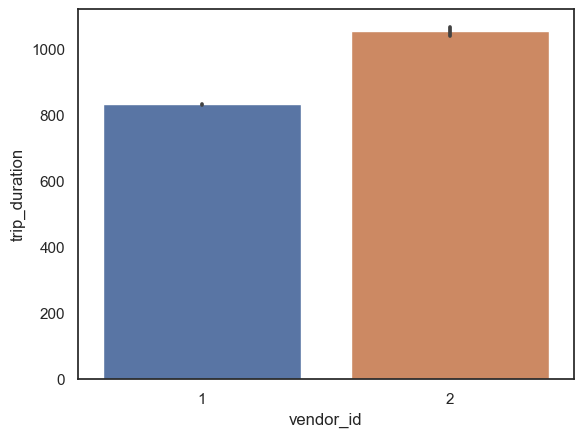

In [94]:
# Trip duration by vendor id
sns.barplot(x='vendor_id', y='trip_duration', data=df)

### Relationship between store_and_fwd_flag and trip_duration

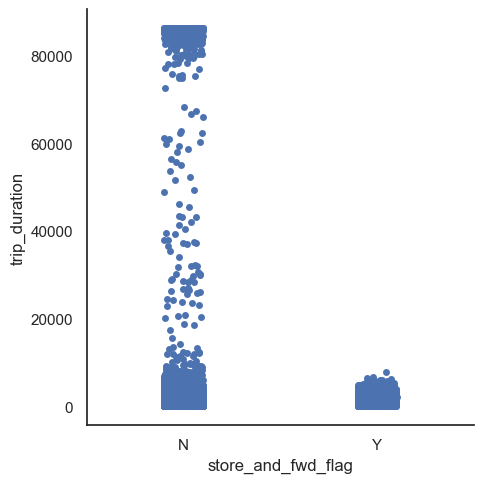

In [56]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)

We see the flag was stored only for short duration trips and for long duration trips the flag was never stored.

### Relationship between geographical location and duration

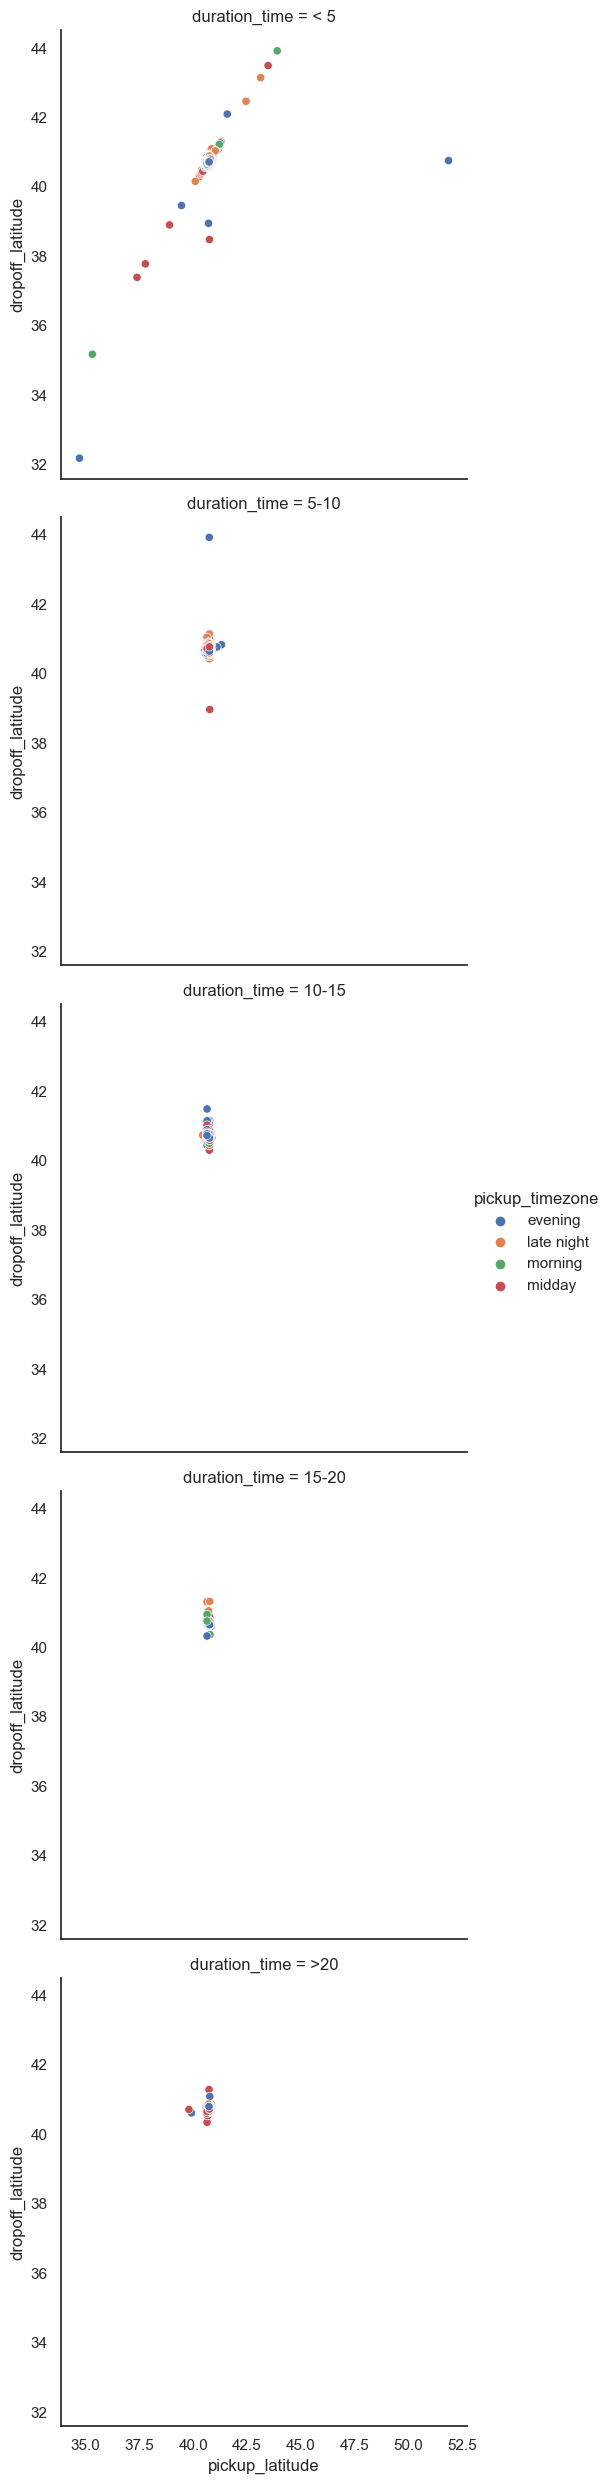

In [57]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=df);

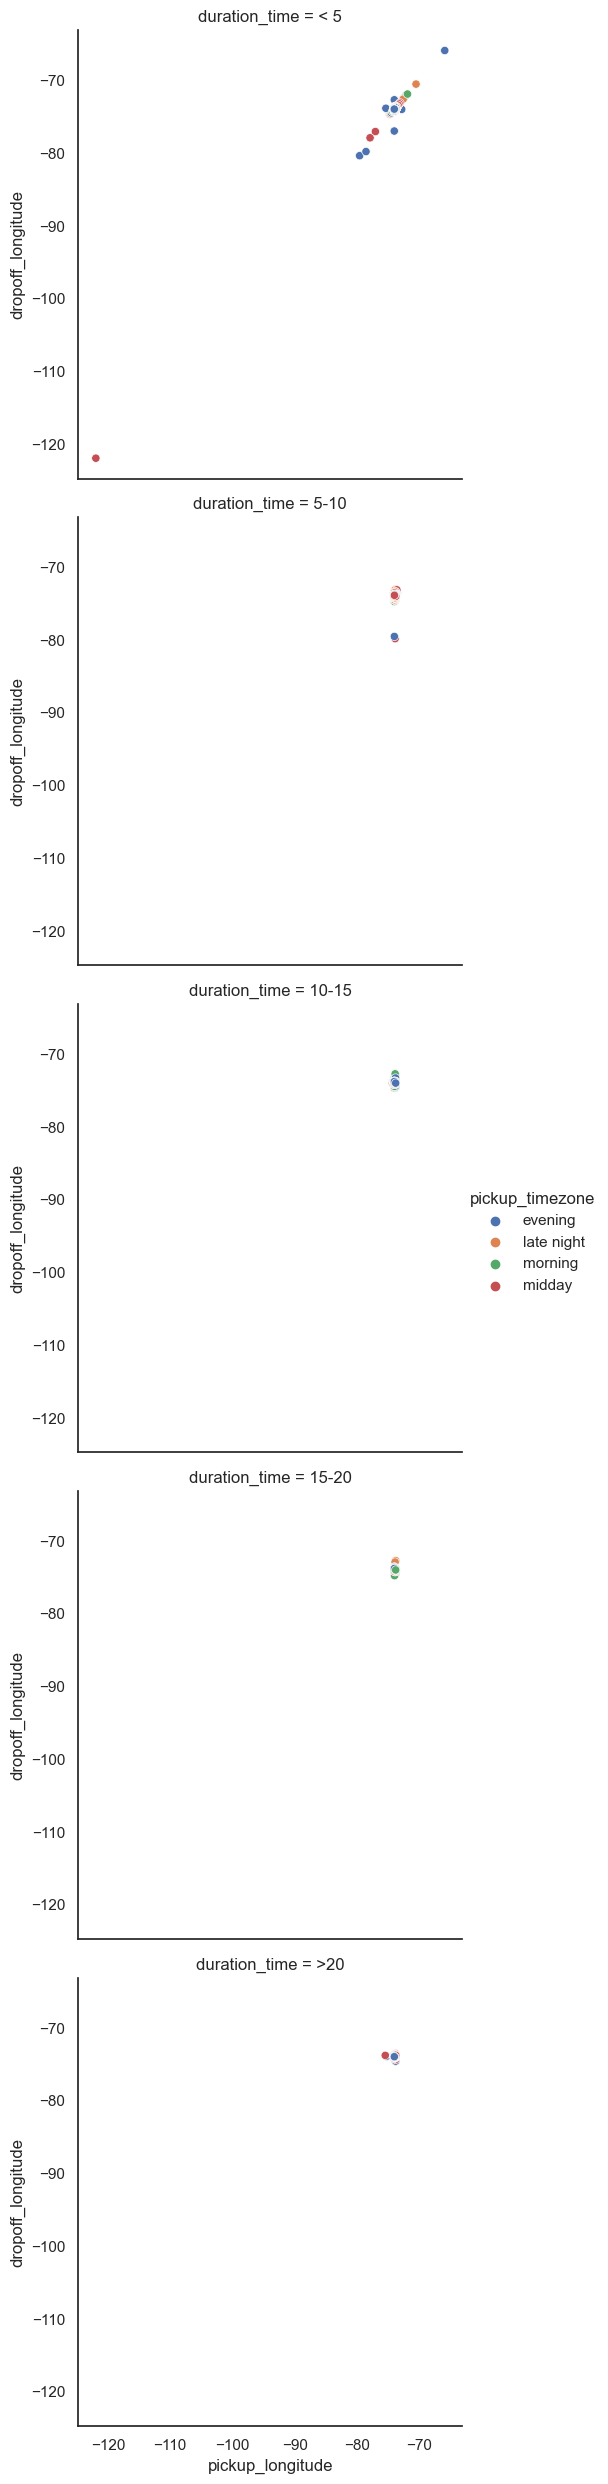

In [58]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='pickup_timezone',row='duration_time',data=df);

# Multivarient Analysis

In [62]:
# Calculating the correlation
corr =df.corr()

In [64]:
corr

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour
vendor_id,1.000000,0.286462,0.008202,0.002857,0.002371,0.005260,0.035205,0.009769,0.009701
passenger_count,0.286462,1.000000,0.001164,-0.004698,-0.000027,-0.003944,0.016520,0.009849,0.009214
pickup_longitude,0.008202,0.001164,1.000000,0.047648,0.780649,0.118472,0.041561,0.010762,0.011172
pickup_latitude,0.002857,-0.004698,0.047648,1.000000,0.119972,0.479358,-0.044442,0.011424,0.018059
dropoff_longitude,0.002371,-0.000027,0.780649,0.119972,1.000000,0.149598,0.025331,-0.022014,-0.023193
dropoff_latitude,0.005260,-0.003944,0.118472,0.479358,0.149598,1.000000,-0.035451,0.014259,0.018173
trip_duration,0.035205,0.016520,0.041561,-0.044442,0.025331,-0.035451,1.000000,0.005488,0.004082
pickup_hour,0.009769,0.009849,0.010762,0.011424,-0.022014,0.014259,0.005488,1.000000,0.934592
dropoff_hour,0.009701,0.009214,0.011172,0.018059,-0.023193,0.018173,0.004082,0.934592,1.000000


<Axes: >

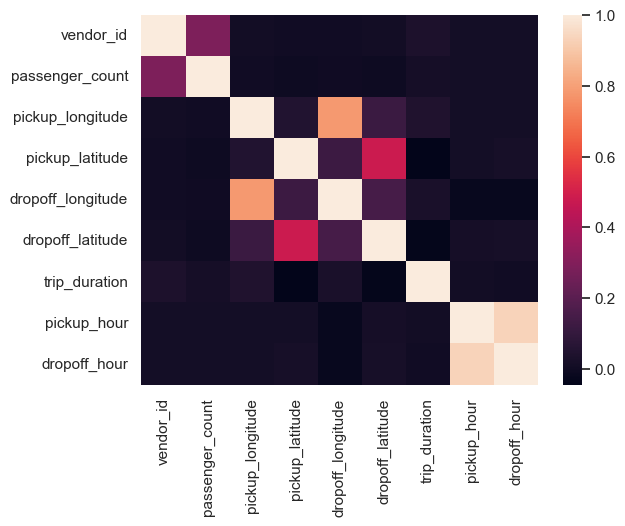

In [63]:
# Visualizing the relationship based on correlation
sns.heatmap(corr)